# Wind vector interpolation for advection scheme

### Problem:
We are currently assuming that wasps only take off exactly on the hour and half hour, and that wind stays constant during each half hour. That's a lot of assuming, and it results in patches of parasitoid flight destinations which will likely make parameter fitting to emergence data rather difficult.

### Data:
Wind data is only given every half-hour, so the first step in any solution is going to be to interpolate the data. Sometimes wind is recorded at exactly the same vector it was an hour ago, so a quadratic spline is not going to to work well. Maybe just linear interpolation for now.

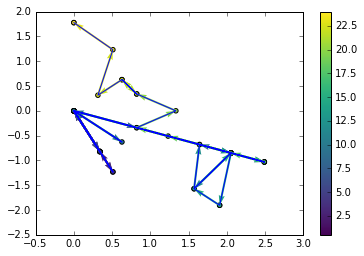

In [16]:
%matplotlib inline
import numpy as np
import sys
sys.path.append('../')
import ParasitoidModel as PM
from matplotlib import pyplot as plt

# Read in wind data
wind_data = PM.read_wind_file('..\data\carnarvonearl') #dict of 2D arrays where columns are the windx,windy,windr,theta

day_wind = wind_data[1]

plt.scatter(day_wind[:,0],day_wind[:,1],c=np.linspace(0.5,24,day_wind.shape[0]),cmap='viridis')
plt.colorbar()
plt.hold(True)
plt.quiver(day_wind[:-1,0],day_wind[:-1,1],day_wind[1:,0]-day_wind[:-1,0], 
           day_wind[1:,1]-day_wind[:-1,1],np.linspace(0.5,24,day_wind.shape[0]),
           scale_units='xy', angles='xy', scale=1,cmap='viridis')
plt.plot(day_wind[:,0],day_wind[:,1])
plt.hold(False)
plt.show()